In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np

In [2]:
from data import LocationDataset
dataset = LocationDataset()
dataset.load_data()
dataset.add_country_code()
dataset.pre_process()

countries, country_counts = np.unique(dataset.country, return_counts=True)
pd.DataFrame({"Country": countries, "N of obs": country_counts})\
    .sort_values("N of obs", ascending=False)

100%|██████████| 123/123 [00:01<00:00, 78.97it/s]


Loading formatted geocoded file...


153055it [00:00, 182648.28it/s]


(153055,)
(153055, 2)
(152682,)
(152682, 2)


,Country,N of obs
26,US,87879
9,ES,12721
3,CA,10144
11,FR,8805
15,IT,6605
23,SE,6193
6,DE,3927
21,PT,3440
20,PL,3273
19,NL,1710


In [7]:
# Where are the coordinates?
import numpy as np
import plotly.express as px
from data import LocationDataset
dataset = LocationDataset()
dataset.load_data()
unique_coordinates = np.unique(dataset.y_data, axis=0)
fig = px.scatter_geo(lat=unique_coordinates[:, 1], lon=unique_coordinates[:, 0])
fig.update_traces(marker={"size": 3, "opacity": 0.8, "color": "red"})
fig.show()

Reading data: 100%|██████████| 123/123 [00:01<00:00, 84.57it/s]


In [214]:
# Plot predictions and targets on map
import numpy as np
import plotly.express as px
from data import undo_min_max_scaling

def plot_prediction_target(n_points):
    # Load the data and select random coordinates
    predictions = np.loadtxt("data/predictions.txt", delimiter=" ")
    targets = np.loadtxt("data/targets.txt", delimiter=" ")
    rand_idx = np.random.randint(predictions.shape[0], size=n_points)
    predictions = predictions[rand_idx, :]
    targets = targets[rand_idx, :]

    # Undo min max scaling
    predictions = undo_min_max_scaling(predictions)
    targets = undo_min_max_scaling(targets)

    # Put data in correct format for plotly
    lat = [*predictions[:, 1].tolist(), *targets[:, 1].tolist()]
    lon = [*predictions[:, 0].tolist(), *targets[:, 0].tolist()]
    color = ["prediction"] * n_points + ["target"] * n_points
    hover = [*range(n_points), *range(n_points)]

    # Make the plot
    fig = px.scatter_geo(lat=lat, lon=lon, color=color, text=hover)
    fig.update_geos(fitbounds="locations")
    fig.update_layout(margin={"r": 0, "t": 0, "l": 10, "b": 0})
    fig.update_traces(textposition="top center")
    fig.show()


plot_prediction_target(n_points=5)

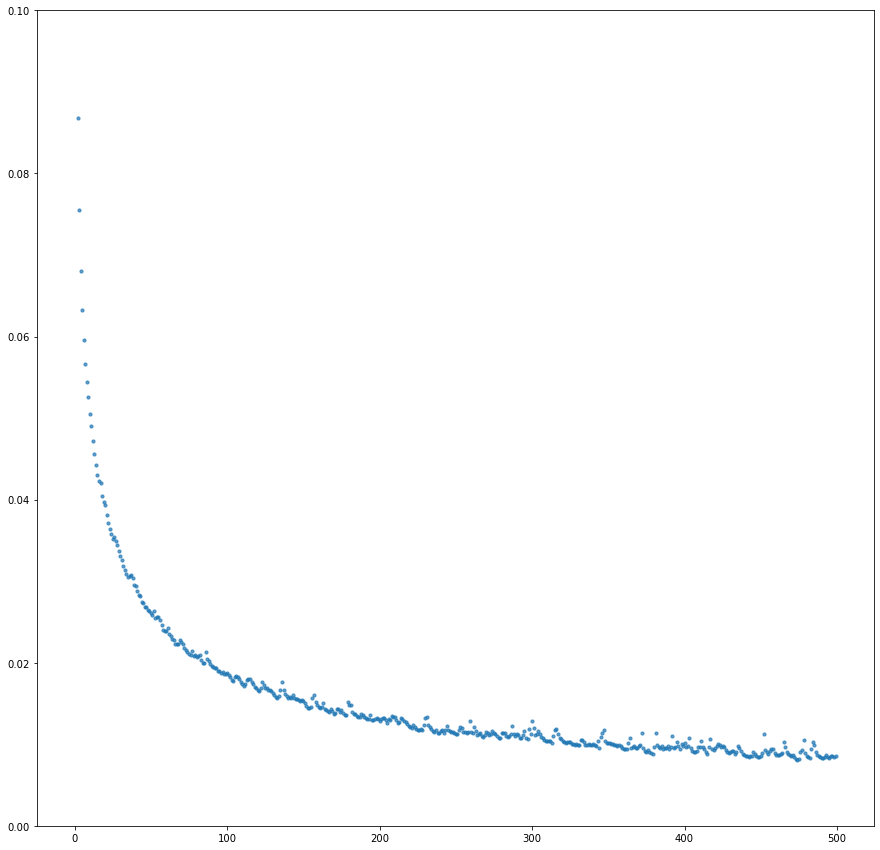

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss():
    loss = np.loadtxt("data/train_loss.txt", delimiter=" ")
    plt.figure(figsize=(15, 15))
    plt.ylim((0, 0.1))
    plt.scatter(y=loss, x=list(range(len(loss))), s=10, alpha=0.7)
    plt.show()

plot_loss()
